In [1]:
import import_ipynb
import lstm_def
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.layers import Dense, LSTM, BatchNormalization, MaxPool1D
from keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from sklearn.metrics import confusion_matrix
%matplotlib inline

importing Jupyter notebook from lstm_def.ipynb
(3200, 16, 17)


Using TensorFlow backend.


In [2]:
####################################
# 기본 옵션
####################################
real_y_num = lstm_def.real_y_num
max_review_length = lstm_def.max_review_length
stride = lstm_def.stride

In [3]:
X_2 = np.load('X_2.npy')
leng = np.load('leng.npy')
X_train2, y_train2 = lstm_def.cut_time_series_added(X_2, leng, max_review_length, stride, real_y_num)

비정상 갯수 :  4400


In [4]:
X_train_pad = sequence.pad_sequences(X_train2, dtype='float64', padding='post', maxlen = max_review_length)
print(X_train_pad.shape)

y_train2 = np.asarray(y_train2)
y_train2 = y_train2.reshape(y_train2.shape[0],1)
print(y_train2.shape)

(8818, 16, 17)
(8818, 1)


In [5]:
#############################
# create the model
#############################
model = Sequential()
#model.add(Conv1D(filters= 64, kernel_size=3, padding='same', activation='relu'))
#model.add(BatchNormalization())
model.add(LSTM(100, activation = 'tanh', return_sequences= True))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train2, epochs=3, batch_size=32)

Epoch 1/3
8818/8818 [==============================] - 9s 1ms/step - loss: 0.1170 - acc: 0.9567
Epoch 2/3
8818/8818 [==============================] - 9s 1ms/step - loss: 0.0361 - acc: 0.9862
Epoch 3/3
8818/8818 [==============================] - ETA: 0s - loss: 0.0299 - acc: 0.988 - 8s 904us/step - loss: 0.0298 - acc: 0.9881


In [6]:
###########################
# 테스트
###########################
X_test_pad = np.load('X_test_pad.npy')
y_test2 = np.load('y_test2.npy')


In [7]:
y_pre = model.predict_classes(X_test_pad)

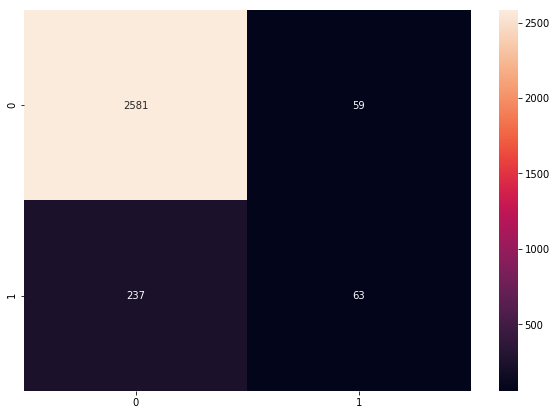

In [8]:
### plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test2, y_pre))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')